In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

df=pd.read_csv("C:/Users/SCIENCE/Documents/time3.csv", parse_dates=True, index_col=[0])
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


In [11]:
df=df.groupby("Order Date").sum()
df

,Units Sold,Total Revenue
Order Date,,
2010-01-03,2956,451026.48
2010-01-04,3961,610231.66
2010-01-12,4460,487388.80
2010-01-17,4137,1745358.93
2010-01-23,7693,1582450.10
...,...,...
2017-05-15,8329,77709.57
2017-05-22,6096,4073773.92
2017-05-29,7157,1092015.06


In [12]:
ts=df["Units Sold"].resample("M").sum()
ts

Order Date
2010-01-31    27177
2010-02-28    24441
2010-03-31    41143
2010-04-30    31147
2010-05-31    31216
              ...  
2017-02-28    35949
2017-03-31    18137
2017-04-30    17337
2017-05-31    41260
2017-06-30     8762
Freq: M, Name: Units Sold, Length: 90, dtype: int64

<Axes: xlabel='Order Date'>

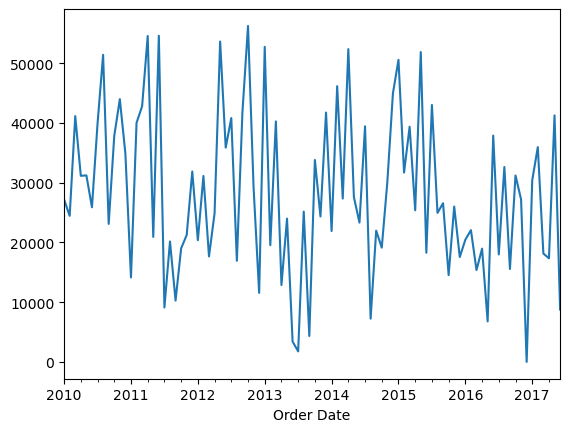

In [13]:
ts.plot()

In [14]:
t=df["Total Revenue"].resample("M").sum()
t

Order Date
2010-01-31     7529487.87
2010-02-28     6680813.31
2010-03-31     6290877.60
2010-04-30     2389855.82
2010-05-31    10833088.52
                 ...     
2017-02-28     9637114.62
2017-03-31     8129230.06
2017-04-30     4457534.50
2017-05-31     9844060.30
2017-06-30     2850432.52
Freq: M, Name: Total Revenue, Length: 90, dtype: float64

<Axes: xlabel='Order Date'>

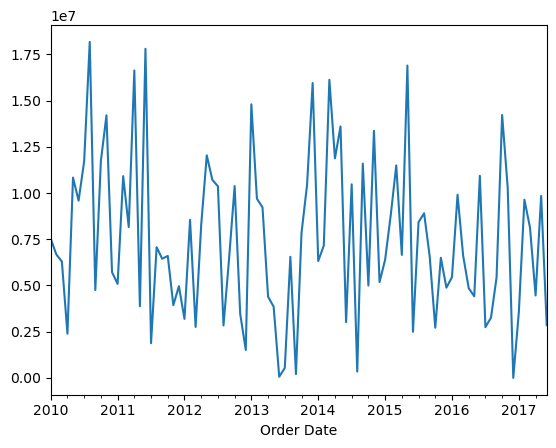

In [15]:
t.plot()

In [24]:
len(ts)
ts

Order Date
2010-01-31    27177
2010-02-28    24441
2010-03-31    41143
2010-04-30    31147
2010-05-31    31216
              ...  
2017-02-28    35949
2017-03-31    18137
2017-04-30    17337
2017-05-31    41260
2017-06-30     8762
Freq: M, Name: Units Sold, Length: 90, dtype: int64

In [25]:

train=ts[:79]
test=ts[79:]
test

Order Date
2016-08-31    32619
2016-09-30    15556
2016-10-31    31198
2016-11-30    27197
2016-12-31        0
2017-01-31    30400
2017-02-28    35949
2017-03-31    18137
2017-04-30    17337
2017-05-31    41260
2017-06-30     8762
Freq: M, Name: Units Sold, dtype: int64

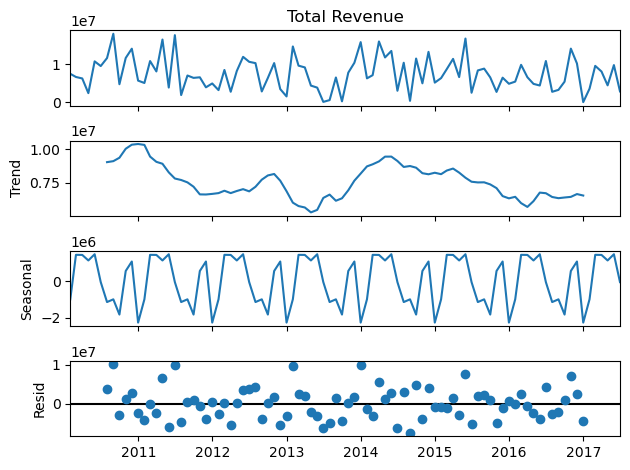

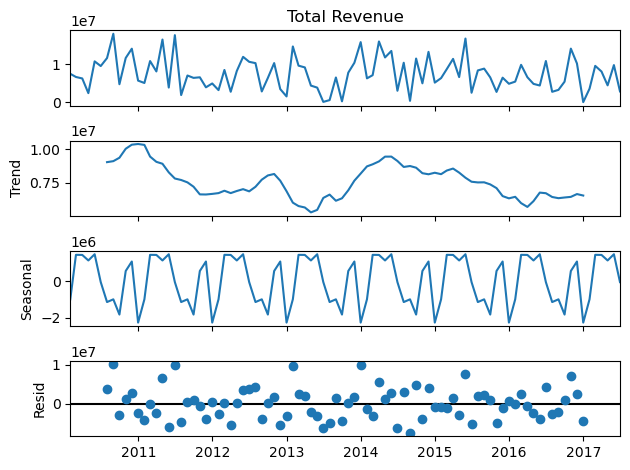

In [26]:
seasonal_decompose(t, model="additive").plot()

In [50]:
len(test)

11

In [29]:
exps=ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=4).fit()


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
pred=exps.forecast(11)
pred

2016-08-31    21586.893175
2016-09-30    21431.522216
2016-10-31    22634.565590
2016-11-30    23952.669402
2016-12-31    21296.949423
2017-01-31    21141.578464
2017-02-28    22344.621838
2017-03-31    23662.725650
2017-04-30    21007.005671
2017-05-31    20851.634712
2017-06-30    22054.678086
Freq: M, dtype: float64

<Axes: xlabel='Order Date'>

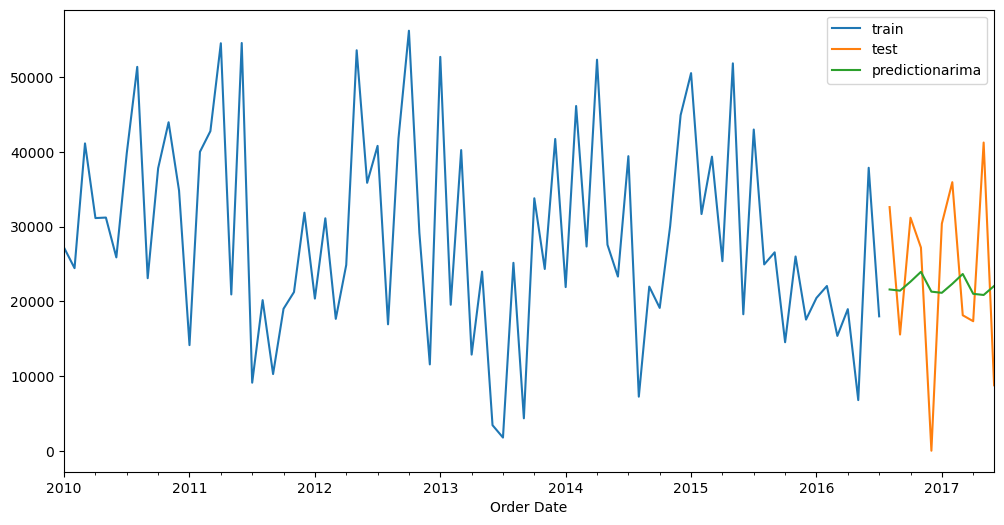

In [53]:
train.plot(legend=True, label="train", figsize=(12,6))
test.plot(legend=True, label="test")
pred.plot(legend=True, label="predictionarima")

In [54]:
print(mean_squared_error(test,pred))

145604001.04437014

In [58]:
np.sqrt(mean_squared_error(test,pred))

12066.648293721424

In [59]:
ts.mean(),np.sqrt(ts).var()

(28261.81111111111, 2072.4333975136637)

In [36]:
exps1=ExponentialSmoothing(ts, seasonal_periods=4, trend="add", seasonal="add").fit()
pred1=exps1.forecast(5)
pred1


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2017-07-31    22338.361416
2017-08-31    18773.920421
2017-09-30    23966.850135
2017-10-31    24676.194302
2017-11-30    21766.043106
Freq: M, dtype: float64

<Axes: xlabel='Order Date'>

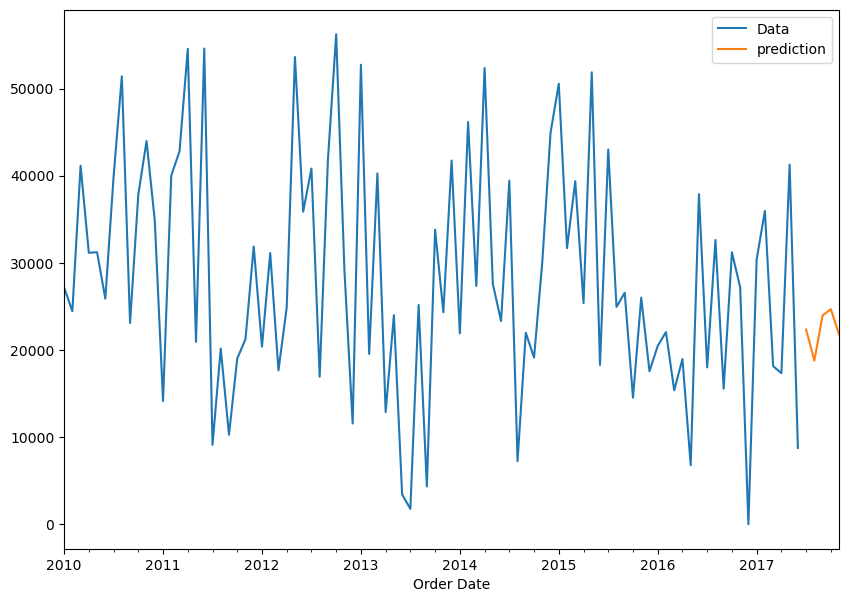

In [41]:
ts.plot(legend=True, label="Data", figsize=(10,7))
pred1.plot(legend=True, label="prediction")

In [ ]:
                                      #$$ HOLTS LINEAR METHOD

In [48]:
## sIMPLE mODEL
model=SimpleExpSmoothing(train).fit(optimized=True)
pred2=model.forecast(10)
pred2

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2016-08-31    27657.549463
2016-09-30    27657.549463
2016-10-31    27657.549463
2016-11-30    27657.549463
2016-12-31    27657.549463
2017-01-31    27657.549463
2017-02-28    27657.549463
2017-03-31    27657.549463
2017-04-30    27657.549463
2017-05-31    27657.549463
Freq: M, dtype: float64

In [43]:
## HOLTS MODEL
mdl=Holt(train, damped_trend=True).fit(optimized=True)
pred3=mdl.forecast(5)
pred3

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2016-08-31    19843.792985
2016-09-30    19507.545152
2016-10-31    19174.659797
2016-11-30    18845.103296
2016-12-31    18518.842359
Freq: M, dtype: float64

<Axes: xlabel='Order Date'>

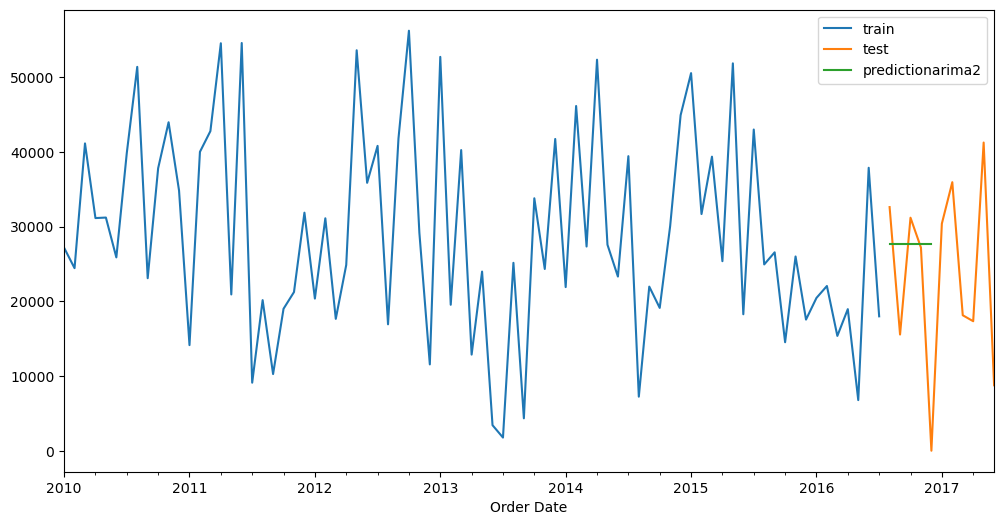

In [44]:
train.plot(legend=True, label="train", figsize=(12,6))
test.plot(legend=True, label="test")
pred2.plot(legend=True, label="predictionarima2")

<Axes: xlabel='Order Date'>

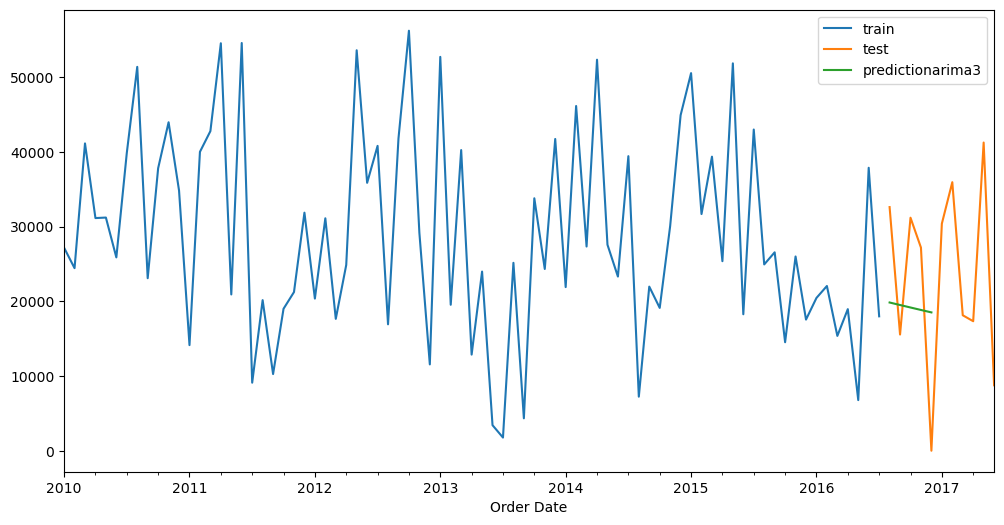

In [45]:
train.plot(legend=True, label="train", figsize=(12,6))
test.plot(legend=True, label="test")
pred3.plot(legend=True, label="predictionarima3")

In [46]:
mdl.summary()

Dep. Variable:,Units Sold,No. Observations:,79
Model:,Holt,SSE,17099279227.861
Optimized:,True,AIC,1526.235
Trend:,Additive,BIC,1538.083
Seasonal:,None,AICC,1527.813
Seasonal Periods:,None,Date:,"Thu, 18 Apr 2024"
Box-Cox:,False,Time:,16:14:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2878571,alpha,True
smoothing_trend,0.0500621,beta,True


In [47]:
model.summary()

Dep. Variable:,Units Sold,No. Observations:,79
Model:,SimpleExpSmoothing,SSE,14796956393.266
Optimized:,True,AIC,1508.811
Trend:,None,BIC,1513.550
Seasonal:,None,AICC,1509.351
Seasonal Periods:,None,Date:,"Thu, 18 Apr 2024"
Box-Cox:,False,Time:,16:14:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
initial_level,27177.000,l.0,False
